## filename: hw3_visualizations.ipynb
#### Homework 3: MongoTutorial
#### Avril Mauro & Katelyn Donn

In [1]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('yelp.json', lines=True)
sns.set(style="ticks", palette="pastel")

### 4A. What is the average star rating of the Kung Fu Teas in PA?

In [2]:
def freq_bar(col, **filters):
    count_list = []
    filter_df = pd.DataFrame(columns=df.columns)

    # make new df based on filters
    for topic, spec in filters.items():
        for index, row in df.iterrows():
            if df[topic][index] is not None and spec in df[topic][index]:
                filter_df.loc[len(filter_df)] = df.iloc[index]
    
    # if items in col are dictionaries
    if type(df[col][0]) is dict:
        for key, val in filter_df[col].items():
            if val is not None:
                for att, boolean in val.items():
                    if boolean is not False:
                        count_list.append(att)
                        
    # if items in col are strings
    if type(df[col][0]) is str:
        for val in filter_df[col]:
            cat = val.split(', ')
            count_list += cat
    
    # if items in col are ints/floats
    if isinstance(filter_df[col][0], (int, np.int64)) or isinstance(filter_df[col][0], (float, np.float64)):
        for val in filter_df[col]:
            count_list.append(val)
        
    # count frequency  
    c = collections.Counter(count_list)
    sorted_items = sorted(c.items(), key=lambda x: x[0])
    labels, values = zip(*sorted_items)
    indexes = np.arange(len(labels))

    # plot
    plt.bar(indexes, values)
    plt.xticks(indexes, labels, rotation='vertical')
    plt.title(f'frequency of {col}')
    plt.show()

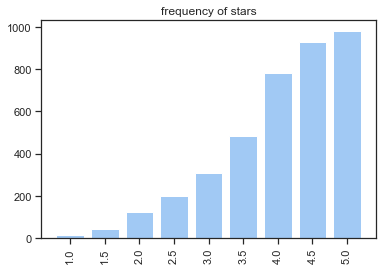

In [3]:
freq_bar('stars', city='Santa Barbara', name='Kung Fu Tea')

### 5A. Where are the best coffee & tea shops on the West Coast?

In [4]:
def bubble_plot(cat, states):
    filter_df = pd.DataFrame(columns=df.columns)
    
    # make new df based on filters
    for index, row in df.iterrows():
        if (df['state'][index] in states) and df['categories'][index] is not None:
            if (cat in df['categories'][index]):
                filter_df.loc[len(filter_df)] = df.iloc[index]
    
    # sort and plot
    filter_df.sort_values(by=['stars'])
    sns.boxplot(x='state', y='stars', data=filter_df, palette='viridis')

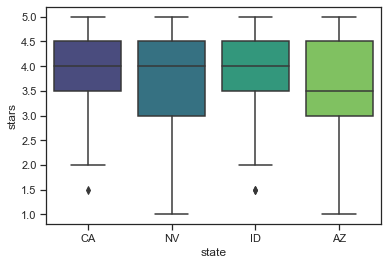

In [5]:
bubble_plot('Coffee & Tea', ['CA', 'OR', 'WA', 'NV', 'UT', 'AZ', 'ID'])

### 8A. In what states do most restaurants serve chicken wings? 

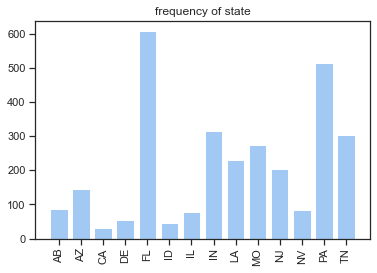

In [6]:
freq_bar('state', categories='Chicken Wings')

### Interpretation

It's interesting to see how the data differs from the MongoDB query to the finished visualization. Especially considering most of our MongoDB answers are concise, and only gather the top 5-10 answers per query, there's a lot of data and information that's not being transferred over and shown to our users. For example, you can see in the first visualization with the bar chart that the frequency of stars is left skewing and there's a large jump between the 3.5 and 4.0 star ratings for the Kung Fu Teas in Santa Barbara. In the MongoDB query, on the other hand, the answer just provides the average star rating for all Kung Fu Teas in the Santa Barbara area, which is 3.9 stars, but without the bar chart to help you visualize the spread of stars, there could've been anomalies in the data we missed or a misunderstanding of where the mean and median of the data would be. For the second graph, the box plots also show what our MongoDB data lacks, which is range of whiskers and a clear understanding of the center of the data. When asking through the MongoDB queries, it provided the name of the cafes as well as the states for the top few cafes, which was useful, but the data here shows, more clearly, that cafes in California and Idaho are on average better than their counterparts in Nevada and Arizona. With the last graph as well, we wanted to show how our original frequency bar chart function could be used for other filters as well. In this example in MongoDB, we used the $regex expression to determine whether or not 'Chicken Wings' were present in a restaurant's category, which, as a filter, differs slightly from the normal filters (e.g. state = 'CA'). As our hierarchical data sometimes had hierarchical data of its own, it was a learning curve trying to figure out how to query deeper into the hierarchy to get the results we wanted. The visualizations as a whole, show that even though our Yelp data extensively covers a few states (notably Philadelphia and Florida, to name a few), there are many states that were excluded from our original dataset (e.g. Oregon, Alaska) for whatever reason. The data collected much more strongly represents the MidWest states, with not as much of a presence on the Coasts, which could also show a bias in the data and a skew in our results. 